# Deteccion de crecimiento urbano con imagenes del satélite Sentinel - 1

## 1_ Entrenamiento del modelo

   En este nootbook se realiza el entrenamiento del modelo de de ML. Se una red neuronal convolucional CNN con una arquitectura U-Net. Dicha red requiere un dataset compuesto por imágenes y máscaras para el entrenamiento. Estas ultimas son imagenes binarias que delimitan el objeto de interés, 1 donde esta y 0 donde no. 
   
### Generacion del data set de entrenamiento

   En esta etapa generamos el dataset de entrenamiento mediante el uso de **GDAL** y **Satproc**. Primero descargamos las imagenes satelitales del bucket de almacenamiento. Luego utilizamos satproc para generar el dataset con todas las caracteristicas necesarias para el modelo: tamaño , cantidad de imagenes, rango de valores, etc.



In [34]:
MODELO_AREA = "atlantico"

BUCKET_TRAIN = "gs://dym-quilmes-trucks-temp/IMMAP/img_v2_2020_s1/" #CHECK

#creamos la carpeta a donde descargaremos las imagenes
BASE_PATH = "../"
PATH_S1_IMAGES_TRAIN = f"{BASE_PATH}imagenes_{MODELO_AREA}/training_images/"

YEAR = "2020"

ANNOTATIONS_FILE_NAME = f"gt_{MODELO_AREA}_4326.geojson"
AOI_FILE_NAME = f"detections_{MODELO_AREA}_buff1km_monoparte.geojson"

SIZE =100
STEP_SIZE = 30

MODELO = f'UNet_TEST_160x160_spe100_3N_spe100_colombia_{MODELO_AREA}.h5'



### Generacion del data set de entrenamiento

   En esta etapa generamos el dataset de entrenamiento mediante el uso de **GDAL** y **Satproc**. Primero descargamos las imagenes satelitales y utilizamos GDAL para quedarnos con la combinacion de bandas deseada. Luego Utilizamos satproc para generar el dataset con todas las caracteristicas necesarias para el modelo: tamaño , cantidad de imagenes, rango de valores, etc.

**Descarga de imágenes**

In [ ]:
#!mkdir -p $PATH_S1_IMAGES_TRAIN  

#!gsutil -m cp -r $BUCKET_TRAIN   $PATH_S1_IMAGES_TRAIN

Podemos verificar que los archivos fueron correctamente descargados

In [ ]:
#!ls $PATH_S1_IMAGES_TRAIN

**Satproc**

Con la herramienta **satproc_extract_chips** se generan, a partir de las imágenes descargadas del bucket, imágenes (chips) generalmente mas pequeñas y máscaras (utilizando las anotaciones de verdad de campo).

In [35]:
path_to_files   = f'{PATH_S1_IMAGES_TRAIN}*.tif' #carpeta a las imagenes
dataset_folder  = f'{BASE_PATH}dataset_{MODELO_AREA}/data_train/{YEAR}/{str(SIZE)}_{str(STEP_SIZE)}/' #carpeta de destino del dataset
vector_file     = f'{BASE_PATH}data/shp/gt'+ ANNOTATIONS_FILE_NAME # archivo vectorial de verdad de campo
vector_file_aoi = f'{BASE_PATH}data/shp/' + AOI_FILE_NAME

**OBS** : tanto las imagenes como el archivo vectorial deben tener la misma georeferencia, por ejemplo 4326

Ejecutamos satproc

In [36]:
!satproc_extract_chips \
                $path_to_files \
                -o  $dataset_folder \
                --size $SIZE \
                --step-size $STEP_SIZE \
                --aoi $vector_file_aoi \
                --labels $vector_file \
                --label-property 'class' \
                --classes 'A' \
                --rescale \
                --rescale-mode values  --min -15 --max 5

Rasters:   0%|                                           | 0/12 [00:00<?, ?it/s]
exp2020_VHd_VVd_VHVVd_bands_0000000000-0000000000.tif windows:   0%| | 0/715 [00
exp2020_VHd_VVd_VHVVd_bands_0000000000-0000000000.tif windows:   1%| | 5/715 [00
exp2020_VHd_VVd_VHVVd_bands_0000000000-0000000000.tif windows:   2%| | 13/715 [0
exp2020_VHd_VVd_VHVVd_bands_0000000000-0000000000.tif windows:   3%| | 21/715 [0
exp2020_VHd_VVd_VHVVd_bands_0000000000-0000000000.tif windows:   4%| | 28/715 [0
exp2020_VHd_VVd_VHVVd_bands_0000000000-0000000000.tif windows:   5%| | 36/715 [0
exp2020_VHd_VVd_VHVVd_bands_0000000000-0000000000.tif windows:   6%| | 43/715 [0
exp2020_VHd_VVd_VHVVd_bands_0000000000-0000000000.tif windows:   7%| | 51/715 [0
exp2020_VHd_VVd_VHVVd_bands_0000000000-0000000000.tif windows:   8%| | 58/715 [0
exp2020_VHd_VVd_VHVVd_bands_0000000000-0000000000.tif windows:   9%| | 65/715 [0
exp2020_VHd_VVd_VHVVd_bands_0000000000-0000000000.tif windows:  10%|1| 72/715 [0
exp2020_VHd_VVd_VHVVd_bands_

exp2020_VHd_VVd_VHVVd_bands_0000000000-0000013568.tif windows:  56%|5| 729/1293 
exp2020_VHd_VVd_VHVVd_bands_0000000000-0000013568.tif windows:  57%|5| 737/1293 
exp2020_VHd_VVd_VHVVd_bands_0000000000-0000013568.tif windows:  58%|5| 745/1293 
exp2020_VHd_VVd_VHVVd_bands_0000000000-0000013568.tif windows:  58%|5| 753/1293 
exp2020_VHd_VVd_VHVVd_bands_0000000000-0000013568.tif windows:  59%|5| 761/1293 
exp2020_VHd_VVd_VHVVd_bands_0000000000-0000013568.tif windows:  59%|5| 769/1293 
exp2020_VHd_VVd_VHVVd_bands_0000000000-0000013568.tif windows:  60%|6| 777/1293 
exp2020_VHd_VVd_VHVVd_bands_0000000000-0000013568.tif windows:  61%|6| 786/1293 
exp2020_VHd_VVd_VHVVd_bands_0000000000-0000013568.tif windows:  61%|6| 794/1293 
exp2020_VHd_VVd_VHVVd_bands_0000000000-0000013568.tif windows:  62%|6| 802/1293 
exp2020_VHd_VVd_VHVVd_bands_0000000000-0000013568.tif windows:  63%|6| 810/1293 
exp2020_VHd_VVd_VHVVd_bands_0000000000-0000013568.tif windows:  63%|6| 819/1293 
exp2020_VHd_VVd_VHVVd_bands_

exp2020_VHd_VVd_VHVVd_bands_0000000000-0000027136.tif windows:  56%|5| 1046/1859
exp2020_VHd_VVd_VHVVd_bands_0000000000-0000027136.tif windows:  57%|5| 1055/1859
exp2020_VHd_VVd_VHVVd_bands_0000000000-0000027136.tif windows:  57%|5| 1064/1859
exp2020_VHd_VVd_VHVVd_bands_0000000000-0000027136.tif windows:  58%|5| 1073/1859
exp2020_VHd_VVd_VHVVd_bands_0000000000-0000027136.tif windows:  58%|5| 1082/1859
exp2020_VHd_VVd_VHVVd_bands_0000000000-0000027136.tif windows:  59%|5| 1091/1859
exp2020_VHd_VVd_VHVVd_bands_0000000000-0000027136.tif windows:  59%|5| 1099/1859
exp2020_VHd_VVd_VHVVd_bands_0000000000-0000027136.tif windows:  60%|5| 1107/1859
exp2020_VHd_VVd_VHVVd_bands_0000000000-0000027136.tif windows:  60%|6| 1116/1859
exp2020_VHd_VVd_VHVVd_bands_0000000000-0000027136.tif windows:  61%|6| 1125/1859
exp2020_VHd_VVd_VHVVd_bands_0000000000-0000027136.tif windows:  61%|6| 1133/1859
exp2020_VHd_VVd_VHVVd_bands_0000000000-0000027136.tif windows:  61%|6| 1141/1859
exp2020_VHd_VVd_VHVVd_bands_

exp2020_VHd_VVd_VHVVd_bands_0000000000-0000040704.tif windows:  51%|5| 676/1325 
exp2020_VHd_VVd_VHVVd_bands_0000000000-0000040704.tif windows:  52%|5| 684/1325 
exp2020_VHd_VVd_VHVVd_bands_0000000000-0000040704.tif windows:  52%|5| 692/1325 
exp2020_VHd_VVd_VHVVd_bands_0000000000-0000040704.tif windows:  53%|5| 700/1325 
exp2020_VHd_VVd_VHVVd_bands_0000000000-0000040704.tif windows:  53%|5| 708/1325 
exp2020_VHd_VVd_VHVVd_bands_0000000000-0000040704.tif windows:  54%|5| 716/1325 
exp2020_VHd_VVd_VHVVd_bands_0000000000-0000040704.tif windows:  55%|5| 723/1325 
exp2020_VHd_VVd_VHVVd_bands_0000000000-0000040704.tif windows:  55%|5| 730/1325 
exp2020_VHd_VVd_VHVVd_bands_0000000000-0000040704.tif windows:  56%|5| 737/1325 
exp2020_VHd_VVd_VHVVd_bands_0000000000-0000040704.tif windows:  56%|5| 744/1325 
exp2020_VHd_VVd_VHVVd_bands_0000000000-0000040704.tif windows:  57%|5| 751/1325 
exp2020_VHd_VVd_VHVVd_bands_0000000000-0000040704.tif windows:  57%|5| 759/1325 
exp2020_VHd_VVd_VHVVd_bands_

exp2020_VHd_VVd_VHVVd_bands_0000013568-0000013568.tif windows:  51%|5| 267/528 [
exp2020_VHd_VVd_VHVVd_bands_0000013568-0000013568.tif windows:  52%|5| 275/528 [
exp2020_VHd_VVd_VHVVd_bands_0000013568-0000013568.tif windows:  54%|5| 283/528 [
exp2020_VHd_VVd_VHVVd_bands_0000013568-0000013568.tif windows:  55%|5| 292/528 [
exp2020_VHd_VVd_VHVVd_bands_0000013568-0000013568.tif windows:  57%|5| 301/528 [
exp2020_VHd_VVd_VHVVd_bands_0000013568-0000013568.tif windows:  59%|5| 309/528 [
exp2020_VHd_VVd_VHVVd_bands_0000013568-0000013568.tif windows:  60%|6| 317/528 [
exp2020_VHd_VVd_VHVVd_bands_0000013568-0000013568.tif windows:  62%|6| 326/528 [
exp2020_VHd_VVd_VHVVd_bands_0000013568-0000013568.tif windows:  63%|6| 335/528 [
exp2020_VHd_VVd_VHVVd_bands_0000013568-0000013568.tif windows:  65%|6| 344/528 [
exp2020_VHd_VVd_VHVVd_bands_0000013568-0000013568.tif windows:  67%|6| 353/528 [
exp2020_VHd_VVd_VHVVd_bands_0000013568-0000013568.tif windows:  69%|6| 362/528 [
exp2020_VHd_VVd_VHVVd_bands_

exp2020_VHd_VVd_VHVVd_bands_0000027136-0000013568.tif windows:   1%| | 6/473 [00
exp2020_VHd_VVd_VHVVd_bands_0000027136-0000013568.tif windows:   3%| | 14/473 [0
exp2020_VHd_VVd_VHVVd_bands_0000027136-0000013568.tif windows:   5%| | 22/473 [0
exp2020_VHd_VVd_VHVVd_bands_0000027136-0000013568.tif windows:   6%| | 30/473 [0
exp2020_VHd_VVd_VHVVd_bands_0000027136-0000013568.tif windows:   8%| | 38/473 [0
exp2020_VHd_VVd_VHVVd_bands_0000027136-0000013568.tif windows:  10%| | 45/473 [0
exp2020_VHd_VVd_VHVVd_bands_0000027136-0000013568.tif windows:  11%|1| 53/473 [0
exp2020_VHd_VVd_VHVVd_bands_0000027136-0000013568.tif windows:  13%|1| 60/473 [0
exp2020_VHd_VVd_VHVVd_bands_0000027136-0000013568.tif windows:  14%|1| 68/473 [0
exp2020_VHd_VVd_VHVVd_bands_0000027136-0000013568.tif windows:  16%|1| 75/473 [0
exp2020_VHd_VVd_VHVVd_bands_0000027136-0000013568.tif windows:  18%|1| 83/473 [0
exp2020_VHd_VVd_VHVVd_bands_0000027136-0000013568.tif windows:  19%|1| 91/473 [0
exp2020_VHd_VVd_VHVVd_bands_

###### Los argumentos:

* **path_to_files** es la ruta a las imágenes 

* **o** es la ruta de destino 

Recomendamos que dicha ruta sea descriptiva, por ejemplo “data_train/120_40/ ” describe : Data_train → datos usados para entrenar; 120_40 → <tamaño de la imagen >_ <tamaño del step-size> 

* **size** tamaño de las imágenes resultantes o chips (las imágenes son cuadradas) 
* **step-size** paso del proceso. Debe ser menor o igual a *size*. Si *step-size* es igual que el *size* entonces no hay overlap en las imágenes resultantes. 

En ocaciones es útil para el entrenamiento generar los chips con un overlap de este modo tenemos más datos para entrenar. 


* **label-property** nombre del campo donde se define cada categoría (solo se usa para el entrenamiento) 

* **classes** nombres de las clases (como aparecen en el geojson), separados por espacios

* **aoi** ruta al archivo vectorial donde están definidas las anotaciones. Al definir una region de interés solo se procesan las imágenes que interceptan esas anotaciones.

* **rescale** lleva los valores de las bandas a 0-255 

Este comando va a generar dos carpetas en la ruta de destino : “images” y “extent”. Los archivos de la primera van a ser de tipo Tiff de 3 bandas (rgb) y los de la segunda van a ser, también, de tipo Tiff pero de N bandas donde N representa el número de clases, en este caso sólo una. Y donde cada una de las bandas es una máscara binaria


## Entrenamiento

Generamos el entrenamiento del modelo utilizando los datasets creados en el paso previo. El modelo es una red neuronal CNN basado en la arquitectura U-Net. Este considera las imágenes y las máscaras binarias como inputs y genera una imagen con la probabilidad de encontrar al objeto de interés.

In [29]:
from unetseg.train import TrainConfig, train
from unetseg.evaluate import plot_data_generator
import os

En esta etapa debemos definir la configuración del modelo de ML.

In [37]:

config = TrainConfig(width      = 160,  #  tamaño de la imagen procesada por la UNet (debe ser multiplos de 16 , por ej 160, 320,etc; y no menor a 80)
                     height     = 160,
                     n_channels = 3,  #  número de canales de la imagen, rgb -> 3
                     n_classes  = 1, # número de clases a clasificar
                     apply_image_augmentation = True, #  si es True , amplia el dataset generando imagenes nuevas a partir de pequeñas variaciones de las ya existentes (rotación,)
                     seed       = 42,
                     epochs     = 20, # Cantidad de veces que el dataset entero puede pasar por el proceso de entrenamiento
                     batch_size = 16, #cantidad de datos que se procesan por vez, puede ser limitado por la memoria de gpu disponible (debe ser multiplo de 16)
                     steps_per_epoch          = 100, #  típicamente debe ser igual al numero de imágenes / el batch_size, si es mayor incrementara el número de imágenes generadas con image augmentation
                     early_stopping_patience  = 5, # a medida que entrena se guardan los resultados del entrenamiento despues de cada epoch, si el error no varió luego de ¿¿10 ?? iteraciones , se corta el proceso porque se entiende que el error ya disminuyó significativamente 
                     validation_split   = 0.2, # se divide la muestra en training (80% de los datos) y validation (20% de los datos) para calcular el error durante el proceso de entrenamiento
                     test_split         = 0.1, # Cantidad de imágenes del dataset
                     images_path        = dataset_folder,#ruta a las imágenes generadas con Satproc
                     model_path         = os.path.join(BASE_PATH,'data/weights/', MODELO),#  ruta del modelo entrenado
                     model_architecture = 'unet',
                     evaluate           = True  ,
                     class_weights      = [1]) 

*Obs*: Es util usar un nombre para el archivo de pesos que de información sobre los parametros de entrenamiento. por ejemplo: < modelo >_< proyecto >_< dim_de_las_imagenes >_< size >_< step_size >_< step_per_epoch >.h5 o similares

Podemos visualizar alguna de las imágenes y máscaras del dataset de entrenamiento. A la izquierda se muestra la imágen y a la derecha la máscara 

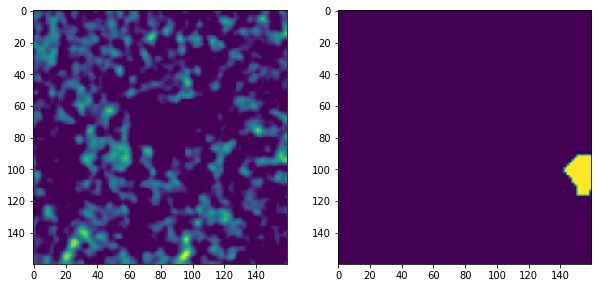

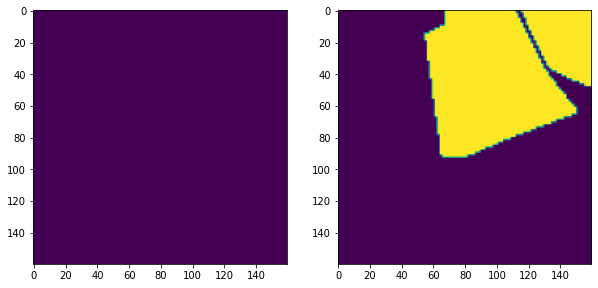

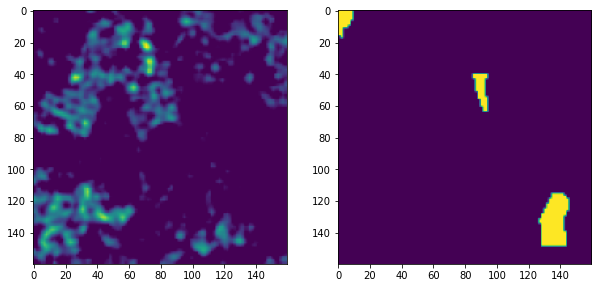

In [38]:
plot_data_generator(num_samples=3, fig_size=(10, 10), train_config=config,img_ch = 3)

Corremos el entrenamiento.

In [39]:
res_config = train(config)

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_69 (Conv2D)             (None, 160, 160, 32  896         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_70 (Conv2D)             (None, 160, 160, 32  9248        ['conv2d_69[0][0]']              
                                )                                                           

100/100 [==============================] - ETA: 0s - loss: 0.3665 - mean_io_u_3: 0.4727
Epoch 00001: val_loss improved from inf to 0.52365, saving model to ../data/weights/UNet_TEST_160x160_spe100_3N_spe100_colombia_atlantico.h5
100/100 [==============================] - 719s 7s/step - loss: 0.3665 - mean_io_u_3: 0.4727 - val_loss: 0.5237 - val_mean_io_u_3: 0.4687
Epoch 2/20
100/100 [==============================] - ETA: 0s - loss: 0.1993 - mean_io_u_3: 0.4733
Epoch 00002: val_loss improved from 0.52365 to 0.23293, saving model to ../data/weights/UNet_TEST_160x160_spe100_3N_spe100_colombia_atlantico.h5
100/100 [==============================] - 714s 7s/step - loss: 0.1993 - mean_io_u_3: 0.4733 - val_loss: 0.2329 - val_mean_io_u_3: 0.4728
Epoch 3/20
100/100 [==============================] - ETA: 0s - loss: 0.1844 - mean_io_u_3: 0.4750
Epoch 00003: val_loss improved from 0.23293 to 0.17986, saving model to ../data/weights/UNet_TEST_160x160_spe100_3N_spe100_colombia_atlantico.h5
100/100

Graficamos las métricas generadas.

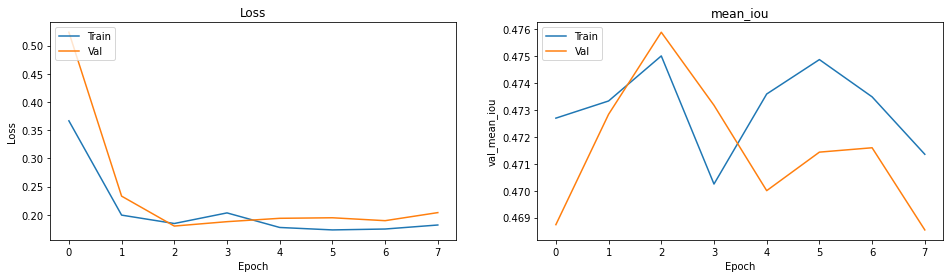

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,4))

plt.subplot(121)
plt.plot(res_config.history['loss'])
plt.plot(res_config.history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

plt.subplot(122)
plt.plot(res_config.history['mean_io_u_3'])
plt.plot(res_config.history['val_mean_io_u_3'])
plt.title('mean_iou')
plt.ylabel('val_mean_iou')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')


plt.show()
